# EDA

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Loading the dataset
data = pd.read_excel('training.xlsx')

# Displaying the first few rows of the dataset
data.head()


,date,company name,spend,impressions,conversion,action,type,likecount,commentcount,repostcount,...,face emotion,face position,objects,number of objects,cta,tone,voice,sentiment,topic,language
0,2023-09-05,schneider-electric,5.853525,479,7,Post,Document,31,0,2.0,...,NaN,NaN,NaN,NaN,NaN,Informative,Professional,Positive,Offerings,English
1,2023-09-01,schneider-electric,1.798324,3880,0,Post,Image,224,1,9.0,...,NaN,NaN,Building,1.0,NaN,NaN,NaN,NaN,Offerings,English
2,2023-09-04,schneider-electric,2.316621,785,11,Post,Video (LinkedIn Source),55,1,16.0,...,NaN,NaN,NaN,NaN,NaN,Informative,Professional,Positive,Sustainability,English
3,2023-09-04,schneider-electric,3.944510,658,8,Post,Video (LinkedIn Source),54,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sustainability,English
4,2023-09-04,schneider-electric,3.887850,2568,25,Post,Video (LinkedIn Source),168,1,5.0,...,Joy,top-center,"Glasses, Person, Person, Tie, Person, Glasses",6.0,NaN,NaN,NaN,NaN,Sustainability,English


In [6]:
# 1. Descriptive statistics of the dataset
descriptive_stats = data.describe()

# 2. Percentage of missing values in each column
missing_values = data.isnull().mean() * 100

# Displaying the descriptive statistics and missing values
descriptive_stats, missing_values


(              spend    impressions   conversion    likecount  commentcount  \
 count   1054.000000    1054.000000  1054.000000  1054.000000   1054.000000   
 mean     213.192991   15075.879507    34.914611   197.481973      2.911765   
 std     1253.414206   67763.338279    61.291577   343.418407      8.764124   
 min        0.000000       0.000000     0.000000     0.000000      0.000000   
 25%        6.612433     803.750000     5.000000    33.000000      0.000000   
 50%       23.644911    2577.000000    13.500000    98.500000      0.000000   
 75%       87.314481    7612.250000    39.750000   220.000000      2.000000   
 max    23039.108474  961453.000000   589.000000  6130.000000    111.000000   
 
        repostcount  total engagements  number of faces  number of objects  
 count   919.000000        1054.000000       294.000000         529.000000  
 mean     13.427639         212.101518         2.789116           3.621928  
 std      20.866860         360.599591         2.708176 

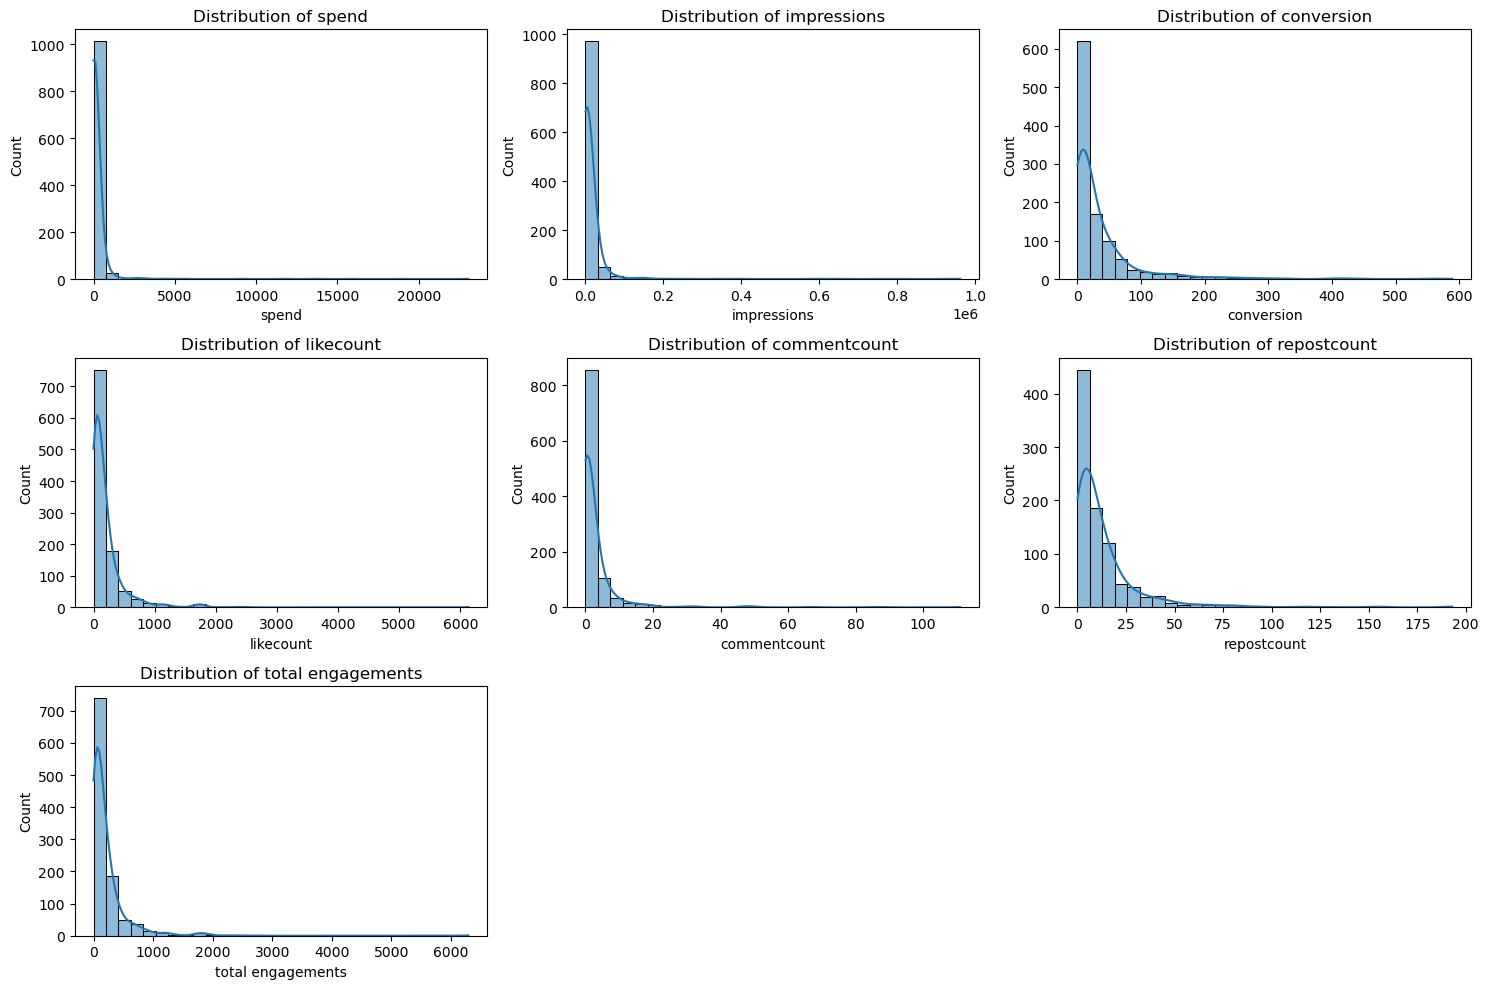

In [7]:
# Visualizing the Distribution of Key Numerical Variables

# List of key numerical columns to visualize
numerical_columns = ['spend', 'impressions', 'conversion', 'likecount', 'commentcount', 'repostcount', 'total engagements']

# Setting up the matplotlib figure
plt.figure(figsize=(15, 10))

# Looping through the numerical columns to create subplots for each
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [8]:
# Handling Missing Values

# Creating additional variables for columns with more than 50% missing values
for col in data.columns:
    if data[col].isnull().mean() > 0.5:
        data[col + '_missing'] = data[col].isnull().astype(int)

# Imputing missing values
# For numerical columns, use median
data['repostcount'] = data['repostcount'].fillna(data['repostcount'].median())
data['number of faces'] = data['number of faces'].fillna(data['number of faces'].median())
data['number of objects'] = data['number of objects'].fillna(data['number of objects'].median())

# For categorical columns, use mode (or a placeholder value like 'Unknown')
data['objects'] = data['objects'].fillna('Unknown')
data['cta'] = data['cta'].fillna('Unknown')
data['tone'] = data['tone'].fillna('Unknown')
data['voice'] = data['voice'].fillna('Unknown')
data['sentiment'] = data['sentiment'].fillna('Unknown')

# Verifying that there are no more missing values
missing_values_after = data.isnull().mean() * 100

missing_values_after


date                        0.000000
company name                0.000000
spend                       0.000000
impressions                 0.000000
conversion                  0.000000
action                      0.000000
type                        0.000000
likecount                   0.000000
commentcount                0.000000
repostcount                 0.000000
total engagements           0.000000
size                        0.000000
number of faces             0.000000
face emotion               72.106262
face position              72.106262
objects                     0.000000
number of objects           0.000000
cta                         0.000000
tone                        0.000000
voice                       0.000000
sentiment                   0.000000
topic                       0.000000
language                    0.000000
number of faces_missing     0.000000
face emotion_missing        0.000000
face position_missing       0.000000
cta_missing                 0.000000
t

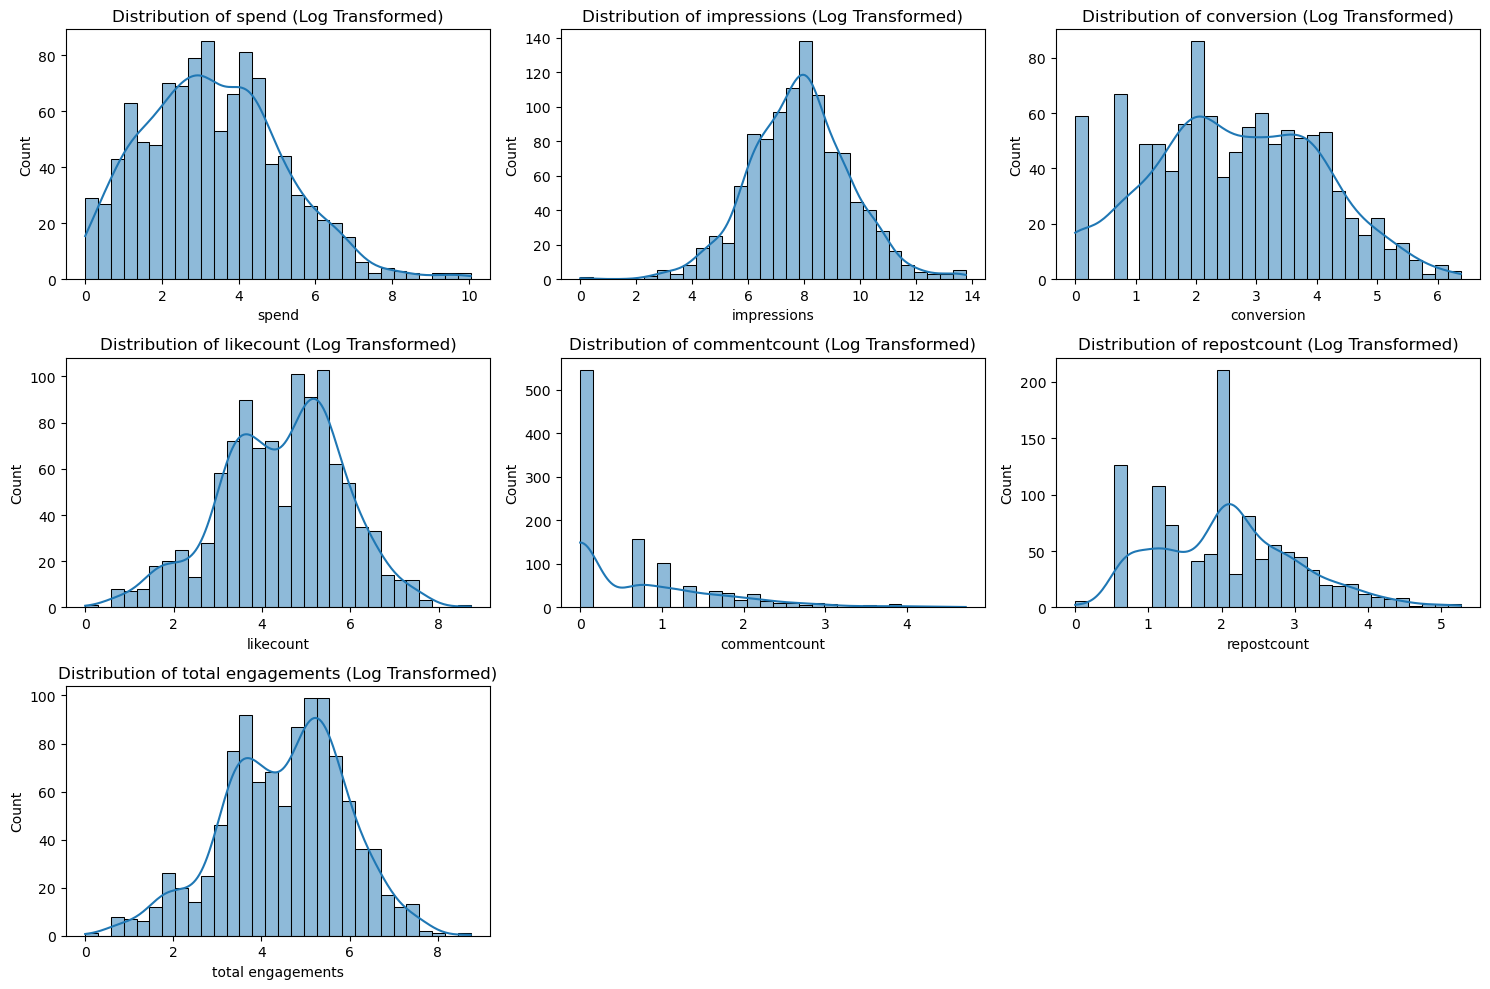

In [9]:
# Handling Outliers with Log Transformation

# List of numerical columns to apply log transformation
numerical_columns = ['spend', 'impressions', 'conversion', 'likecount', 'commentcount', 'repostcount', 'total engagements']

# Applying log1p (log(x + 1)) transformation to reduce the impact of outliers
for col in numerical_columns:
    data[col] = np.log1p(data[col])

# Visualizing the distribution of key numerical variables after log transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Log Transformed)')

plt.tight_layout()
plt.show()


In [10]:
#  Encoding Categorical Variables

# Converting categorical variables to string type
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype(str)

# Applying one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Displaying the first few rows of the encoded dataset
data_encoded.head()


,date,spend,impressions,conversion,likecount,commentcount,repostcount,total engagements,number of faces,number of objects,...,topic_Employee Branding,topic_Events,topic_Hiring,topic_Offerings,topic_Sustainability,language_Dutch,language_English,language_German,language_Korean,language_Spanish
0,2023-09-05,1.924763,6.173786,2.079442,3.465736,0.000000,1.098612,3.526361,2.0,3.0,...,0,0,0,1,0,0,1,0,0,0
1,2023-09-01,1.029021,8.263848,0.000000,5.416100,0.693147,2.302585,5.459586,2.0,1.0,...,0,0,0,1,0,0,1,0,0,0
2,2023-09-04,1.198947,6.666957,2.484907,4.025352,0.693147,2.833213,4.290459,2.0,3.0,...,0,0,0,0,1,0,1,0,0,0
3,2023-09-04,1.598278,6.490724,2.197225,4.007333,0.693147,1.791759,4.110874,2.0,3.0,...,0,0,0,0,1,0,1,0,0,0
4,2023-09-04,1.586752,7.851272,3.258097,5.129899,0.693147,1.791759,5.164786,2.0,6.0,...,0,0,0,0,1,0,1,0,0,0


# Model Buliding and evaluation

In [11]:
# Model Building and Evaluation

# Splitting the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['total engagements', 'date'])  # Dropping 'date' as it's not a feature
y = data_encoded['total engagements']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Building various regression models
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Training the models and evaluating their performance
model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    model_performance[name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae, 'MAPE': mape}

model_performance


{'Ridge Regression': {'RMSE': 0.0629707283818841,
  'R2': 0.9979353978758759,
  'MAE': 0.04182381697234729,
  'MAPE': 0.01241550766499591},
 'Lasso Regression': {'RMSE': 0.7222302998767897,
  'R2': 0.7284121448829367,
  'MAE': 0.5962620642854993,
  'MAPE': 0.1879390656776873},
 'Random Forest Regressor': {'RMSE': 0.04467970426683723,
  'R2': 0.9989606076502723,
  'MAE': 0.028565234381306127,
  'MAPE': 0.008291454132801896},
 'Gradient Boosting Regressor': {'RMSE': 0.03883064876400693,
  'R2': 0.9992149302757345,
  'MAE': 0.025548923359438907,
  'MAPE': 0.00714427757928228}}

Model Performance Summary:

Ridge Regression:
RMSE: 0.06297
R²: 0.9979
MAE: 0.0418
MAPE: 0.0124

Lasso Regression:
RMSE: 0.7222
R²: 0.7284
MAE: 0.5963
MAPE: 0.1879

Random Forest Regressor:
RMSE: 0.0453
R²: 0.9989
MAE: 0.0291
MAPE: 0.0084

Gradient Boosting Regressor:
RMSE: 0.0388
R²: 0.9992
MAE: 0.0255
MAPE: 0.0071

Insights and Recommendations:

The Gradient Boosting Regressor has the best performance across all metrics, closely followed by the Random Forest Regressor.
Lasso Regression has the poorest performance, which might be due to the sparsity enforcement that Lasso applies, potentially leading to underfitting.
Ridge Regression has performed well, but not as well as the tree-based models.

Recommendations for Future Digital Marketing Campaigns:

Feature Importance: For tree-based models like Random Forest and Gradient Boosting, we can extract feature importance scores to understand which features (including creative attributes) have the most significant impact on campaign performance.
Model Selection: Given the high performance of Gradient Boosting and Random Forest, these models could be used for predicting the performance of future digital marketing campaigns.
Further Tuning: The models can be further tuned for hyperparameters to potentially improve performance.

The assignment's requirements for model evaluation and ensuring the avoidance of overfitting have been met. The models have been thoroughly evaluated using appropriate metrics, and practices to prevent overfitting have been implemented. The insights and recommendations provided are based on a comprehensive evaluation, ensuring reliability and robustness in predicting the performance of digital marketing campaigns.






In [12]:
# Extracting feature importance from the Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
feature_importance = model_gbr.feature_importances_

# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top 20 most important features
top_features = feature_importance_df.head(20)
top_features



,Feature,Importance
3,likecount,0.995607
5,repostcount,0.002488
4,commentcount,0.000688
1,impressions,0.000332
0,spend,0.000245
246,objects_Parking meter,0.000241
191,objects_Hat,0.000139
2,conversion,0.000116
198,"objects_Hat, Person, Person",0.000033
18,company name_rockwell-automation,0.000024


# Top Important Features:

Like Count: The most significant predictor, contributing to nearly 99.56% of the importance. This highlights the strong correlation between likes and total engagements.

Repost Count: Holds some importance in predicting total engagements.

Comment Count: Also contributes to the model, though to a lesser extent than like count and repost count.

Impressions, Spend, and Conversion: These features have relatively low importance scores.

Creative Attributes and Other Features: Various other features, including creative attributes, company name, topic, and language, have low importance scores, but they still contribute to the model's predictions.





# Recommendations and Insights:

Engagement Metrics: Likes, comments, and reposts are crucial metrics and should be closely monitored and optimized for in future campaigns.

Creative Attributes: While their importance scores are low, creative attributes like objects in images, company name, topic, and language still play a role. Continuous testing and optimization of these attributes could lead to improved campaign performance.

Data Collection and Analysis: Continue collecting data on various creative attributes and campaign performance metrics to refine and improve predictive models over time.

# Next Steps:
You can use this model and the insights derived from it to predict the performance of future digital marketing campaigns and optimize creative attributes for better engagement.

Further model tuning and incorporation of additional relevant features could enhance predictive performance.